# Evaluate BartPy on sample regression data

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression

from matplotlib import pyplot as plt
%matplotlib inline

from bartpy.sklearnmodel import SklearnModel

In [2]:
regression = make_regression(n_samples=2000, n_features=20, n_informative=10)
X, y = regression

In [3]:
def get_clean_model():
    return SklearnModel(n_chains=4, 
                        n_jobs=-1, 
                        n_burn=200,
                        n_samples=1000, 
                        n_trees=200, 
                        initializer=None)

In [4]:
model = get_clean_model()
model.fit(X, y)

SklearnModel(alpha=0.95, beta=2.0, initializer=None, n_burn=200, n_chains=4,
             n_jobs=-1, n_samples=1000, n_trees=200, sigma_a=0.001,
             sigma_b=0.001, store_acceptance_trace=False,
             store_in_sample_predictions=False, thin=0.1,
             tree_sampler=<bartpy.samplers.unconstrainedtree.treemutation.UnconstrainedTreeMutationSampler object at 0x7fc778bb9d10>)

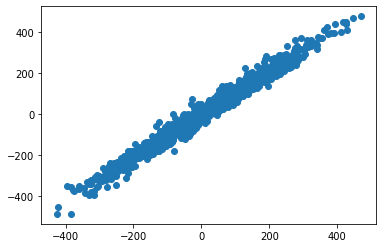

In [5]:
plt.scatter(model.predict(X), y)

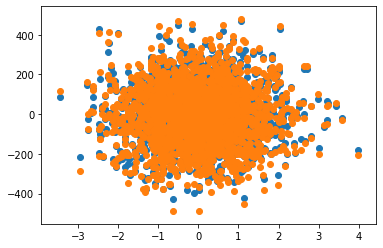

In [6]:
plt.scatter(X[:, 0], model.predict(X))
plt.scatter(X[:, 0], y)

In [7]:
from sklearn.model_selection import KFold
from datetime import datetime
from catboost import CatBoostRegressor, Pool
kf = KFold(n_splits=2, shuffle=True)
b_scores, c_scores = [], []
for train_index, test_index in kf.split(X):
    print(datetime.now())
    model = get_clean_model()
    model.fit(X[train_index], y[train_index])
    b_scores.append(np.sum(np.square(y[test_index] - model.predict(X[test_index]))))
    print(datetime.now())
    eval_pool = Pool(X[train_index][:300,:], y[train_index][:300])
    train_pool = Pool(X[train_index][300:,:], y[train_index][300:])
    c_model = CatBoostRegressor()
    c_model.fit(train_pool, eval_set=eval_pool, verbose=300)
    c_scores.append(np.sum(np.square(y[test_index] - c_model.predict(X[test_index]))))
    print(datetime.now())

2020-04-15 06:42:19.360759
2020-04-15 06:44:25.237537
Learning rate set to 0.043074
0:	learn: 147.5860308	test: 139.5846629	best: 139.5846629 (0)	total: 68.2ms	remaining: 1m 8s
300:	learn: 10.6295816	test: 26.4414621	best: 26.4414621 (300)	total: 570ms	remaining: 1.32s
600:	learn: 4.6150550	test: 23.0637667	best: 23.0637667 (600)	total: 1.03s	remaining: 686ms
900:	learn: 2.4713029	test: 22.6120298	best: 22.6120298 (900)	total: 1.43s	remaining: 157ms
999:	learn: 2.0047184	test: 22.5633313	best: 22.5633313 (999)	total: 1.56s	remaining: 0us

bestTest = 22.56333129
bestIteration = 999

2020-04-15 06:44:27.010944
2020-04-15 06:44:27.011257
2020-04-15 06:46:37.413548
Learning rate set to 0.043074
0:	learn: 137.5676637	test: 149.2084231	best: 149.2084231 (0)	total: 3.07ms	remaining: 3.07s
300:	learn: 11.2687535	test: 39.2827762	best: 39.2827762 (300)	total: 327ms	remaining: 759ms
600:	learn: 4.7385856	test: 34.7193126	best: 34.7193126 (600)	total: 665ms	remaining: 441ms
900:	learn: 2.3271836	

In [8]:
print(b_scores)
print(c_scores)

[728849.355589103, 805988.7792926353]
[688369.736772838, 932436.9130089999]


In [9]:
np.sqrt(b_scores[0]) / X.shape[0], np.sqrt(c_scores[0]) / X.shape[0]

(0.4268633726349401, 0.41484025141397446)

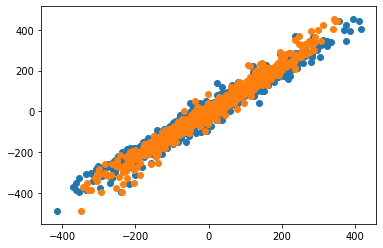

In [10]:
plt.scatter(model.predict(X[test_index]), y[test_index])
plt.scatter(c_model.predict(X[test_index]), y[test_index])

In [12]:
!pip install yellowbrick

     |████████████████████████████████| 263 kB 1.1 MB/s eta 0:00:01


In [ ]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = get_clean_model()
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train) 
visualizer.score(X, y)

/Users/jacoltman/opt/anaconda3/envs/bartpy/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from yellowbrick.regressor import PredictionError
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = get_clean_model()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train) 
visualizer.score(X, y)